# Lab - 2

Name: Purusharth Malik

Registration No.: 2348542

### Perform the operation X, Y, Z, H, S, T 
### Execute the operations on a state vector.
### Draw a simple circuit for these operation.
### Finally,  simulate the result of running this experiment  10000 times.

Quantum Circuit:


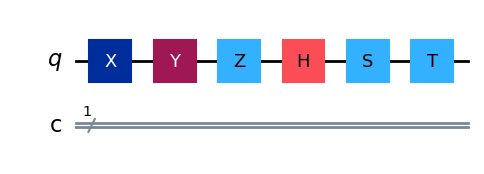

In [7]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Creating a single-qubit system
qc = QuantumCircuit(1, 1)

qc.x(0)  # X gate
qc.y(0)  # Y gate
qc.z(0)  # Z gate
qc.h(0)  # Hadamard gate
qc.s(0)  # S gate
qc.t(0)  # T gate

print("Quantum Circuit:")
qc.draw('mpl')


Final State Vector:
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

Measurement Results:
{'0 0': 507, '1 0': 517}

Probability of measuring 00: 0.4951
Probability of measuring 11: 0.5049


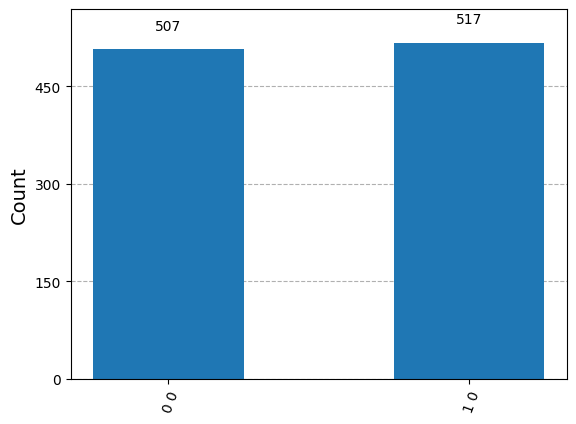

In [8]:
from qiskit.visualization import plot_histogram

# Executing the operations on a state vector
statevector = Statevector([1, 0])
statevector.evolve(qc)
print("\nFinal State Vector:")
print(statevector)

qc.measure_all()
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts(qc)

print("\nMeasurement Results:")
print(counts)

# Calculate probabilities
total_shots = sum(counts.values())
prob_0 = counts.get('0 0', 0) / total_shots
prob_1 = counts.get('1 0', 0) / total_shots

print(f"\nProbability of measuring 00: {prob_0:.4f}")
print(f"Probability of measuring 11: {prob_1:.4f}")

plot_histogram(counts)

### Proof that R is square root of NOT  operation. where R is a Hadamard operation, followed by the S operation, followed by another Hadamard operation.

In [10]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

# Function to create the R gate
def R_gate():
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.s(0)
    qc.h(0)
    return Operator(qc)

R = R_gate()

# Creating the X gate (NOT operation)
X = Operator.from_label('X')

# Computing R^2
R_squared = R.compose(R)

# Checking if R^2 is equal to X (NOT)
is_sqrt_not = R_squared.equiv(X)

print("R gate (H-S-H):")
print(R)

print("\nR^2:")
print(R_squared)

print("\nX gate (NOT):")
print(X)

print(f"\nIs R the square root of NOT? {is_sqrt_not}")

# Demonstrate R^2 is NOT on |0⟩ and |1⟩ states
qc_0 = QuantumCircuit(1)
qc_0.append(R, [0])
qc_0.append(R, [0])

qc_1 = QuantumCircuit(1)
qc_1.x(0)  # Start with |1⟩
qc_1.append(R, [0])
qc_1.append(R, [0])

print("\nApplying R^2 to |0⟩:")
print(Statevector.from_instruction(qc_0))

print("\nApplying R^2 to |1⟩:")
print(Statevector.from_instruction(qc_1))

R gate (H-S-H):
Operator([[0.5+0.5j, 0.5-0.5j],
          [0.5-0.5j, 0.5+0.5j]],
         input_dims=(2,), output_dims=(2,))

R^2:
Operator([[0.-2.46519033e-32j, 1.+0.00000000e+00j],
          [1.+0.00000000e+00j, 0.+2.46519033e-32j]],
         input_dims=(2,), output_dims=(2,))

X gate (NOT):
Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Is R the square root of NOT? True

Applying R^2 to |0⟩:
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

Applying R^2 to |1⟩:
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


We have also demonstrated that $\text{R}^{2}$ does behave exactly like a `NOT` gate when applied to the ket 0 and ket 1 statevectors.

# End